In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, normaltest
import numpy as np

In [2]:
MOVING_META_DATA_PATH = "track-meta-data.json"
MOVING_AUDIO_FEATURES_PATH = "track-audio-features.json"

In [45]:
CONTROL_META_DATA_PATH = "control-track-meta-data.json"
CONTROL_AUDIO_FEATURES_PATH = "control-track-audio-features.json"

Different Control Group

In [14]:
CONTROL_META_DATA_PATH = "playlist_data/6qZnImkqxbRtL9FiwqHkGK-meta-data.json"
CONTROL_AUDIO_FEATURES_PATH = "playlist_data/6qZnImkqxbRtL9FiwqHkGK-audio-features.json"

In [3]:
CONTROL_META_DATA_PATH = "control-meta-data-v2.json"
CONTROL_AUDIO_FEATURES_PATH = "control-audio-features-v2.json"

In [4]:
with open(MOVING_META_DATA_PATH) as f:
    moving_meta_data = json.load(f)

In [5]:
with open(MOVING_AUDIO_FEATURES_PATH) as f:
    moving_audio_features = json.load(f)

In [6]:
with open(CONTROL_META_DATA_PATH) as f:
    control_meta_data = json.load(f)

In [7]:
with open(CONTROL_AUDIO_FEATURES_PATH) as f:
    control_audio_features = json.load(f)

In [8]:
len(moving_meta_data), len(control_meta_data)

(3652, 777)

In [9]:
def get_feature(feature_name, all_features):
    return list(map(lambda x: x[feature_name], all_features))

In [10]:
def get_meta_data(feature_name, meta_data):
    return list(map(lambda x: x[feature_name], meta_data))

In [11]:
moving_feature = {}
for feature in moving_audio_features[0].keys():
    moving_feature[feature] = get_feature(feature, moving_audio_features)

In [12]:
control_feature = {}
for feature in control_audio_features[0].keys():
    control_feature[feature] = get_feature(feature, control_audio_features)

In [13]:
moving_meta = {}
for feature in moving_meta_data[0].keys():
    moving_meta[feature] = get_meta_data(feature, moving_meta_data)

In [14]:
control_meta = {}
for feature in control_meta_data[0].keys():
    control_meta[feature] = get_meta_data(feature, control_meta_data)

In [15]:
def create_comparison_histograms(name, data_source="features"):
    fig, axs = plt.subplots(2, 1)
    if data_source == "features":
        feature1 = moving_feature[name]
        feature2 = control_feature[name]
    elif data_source == "meta":
        feature1 = moving_meta[name]
        feature2 = control_meta[name]
    
    x1_min, x1_max = min(feature1), max(feature1)
    x2_min, x2_max = min(feature2), max(feature2)
    x_min = min(x1_min, x2_min)
    x_max = max(x1_max, x2_max)
    diff = x_max - x_min
    xlim = (x_min - (diff * 0.05), x_max + (diff * 0.05))
    h1 = sns.histplot(feature1, ax=axs[0])
    h2 = sns.histplot(feature2, ax=axs[1], color='r')
    h1.set_xlim(xlim)
    h2.set_xlim(xlim)
    
    h1.set_title(name)
    print("P-Values")
    print("Normal-Test:", normaltest(feature1).pvalue, sep="\t")
    print("T-Test:", ttest_ind(feature1, feature2, equal_var=False).pvalue, sep="\t\t")
    print("Mann-Whitney:", mannwhitneyu(feature1, feature2).pvalue, sep="\t")

P-Values
Normal-Test:	6.115171869209411e-74
T-Test:		6.526403733908215e-48
Mann-Whitney:	2.2329639704105423e-51


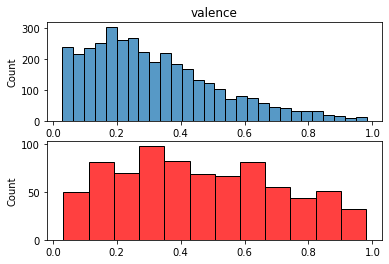

In [16]:
create_comparison_histograms("valence")

P-Values
Normal-Test:	1.8189372486766934e-121
T-Test:		3.1179329768765975e-43
Mann-Whitney:	6.074952312876034e-42


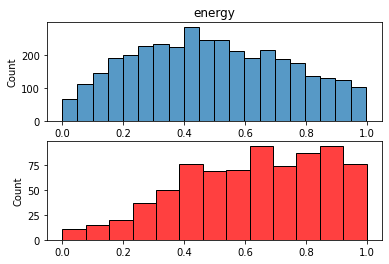

In [17]:
create_comparison_histograms("energy")

P-Values
Normal-Test:	0.006191027217558171
T-Test:		1.2912523017521502e-16
Mann-Whitney:	5.491124391644293e-18


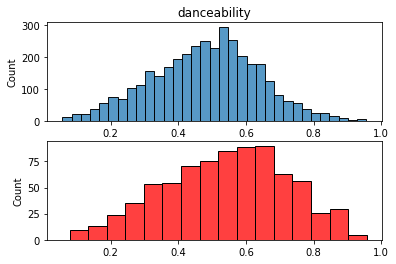

In [18]:
create_comparison_histograms("danceability")

P-Values
Normal-Test:	1.4328097301667345e-16
T-Test:		1.5684760852249243e-13
Mann-Whitney:	4.3347066763754574e-10


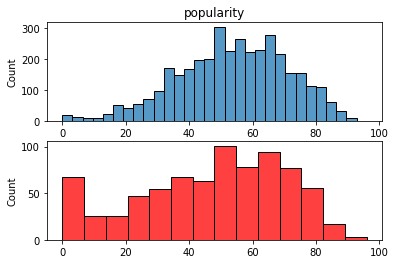

In [19]:
create_comparison_histograms("popularity", data_source="meta")

P-Values
Normal-Test:	0.0
T-Test:		6.3948780964629455e-09
Mann-Whitney:	2.0659392252109244e-21


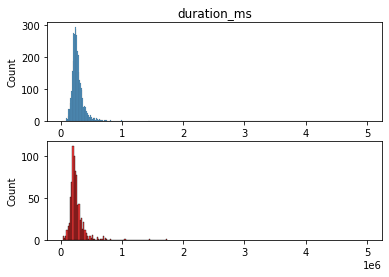

In [20]:
create_comparison_histograms("duration_ms", data_source="meta")

P-Values
Normal-Test:	9.458063911158476e-21
T-Test:		0.0005565814994116401
Mann-Whitney:	0.0010012330839632717


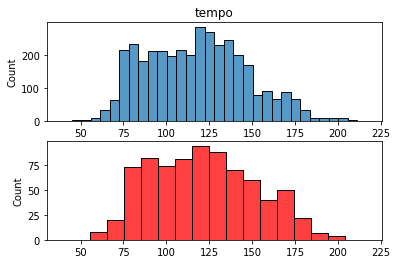

In [21]:
create_comparison_histograms("tempo")